# Notes
#1. No disease: 0
#2. Disease: 1

### Importing libraries:

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score

from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import imread
import plotly.graph_objects as go

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics

In [ ]:
df = pd.read_csv('heart2.csv')

In [ ]:
df.shape

In [ ]:
df.head()

### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

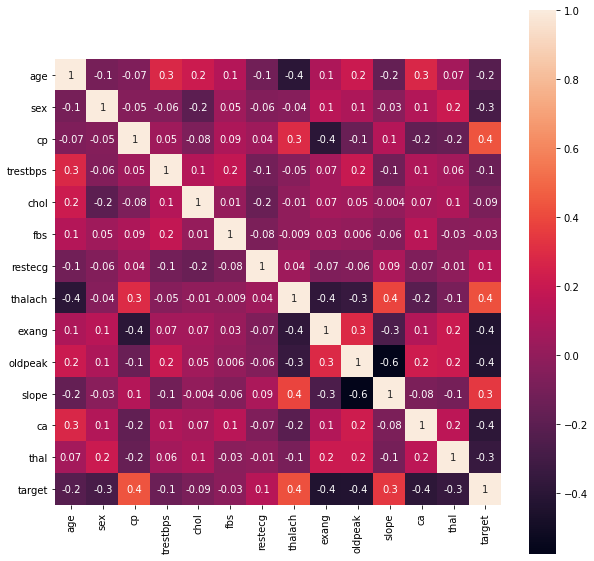

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g',square=True, ax =ax);

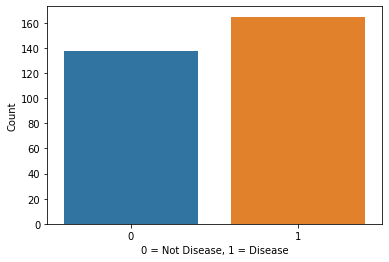

In [ ]:
sns.countplot(x="target", data=df)
plt.xlabel("0 = Not Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


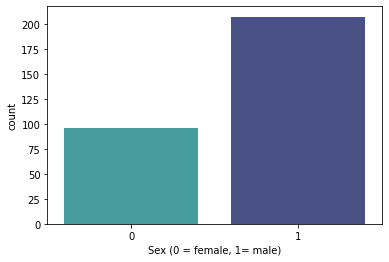

In [ ]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


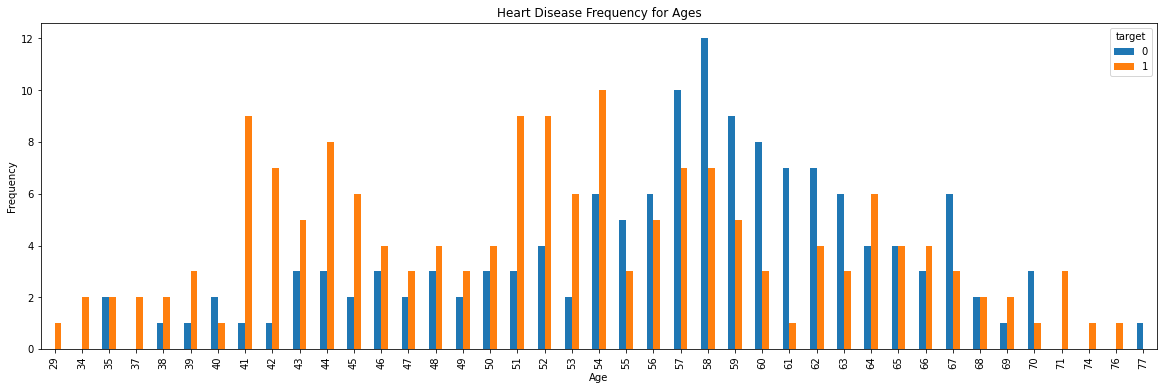

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

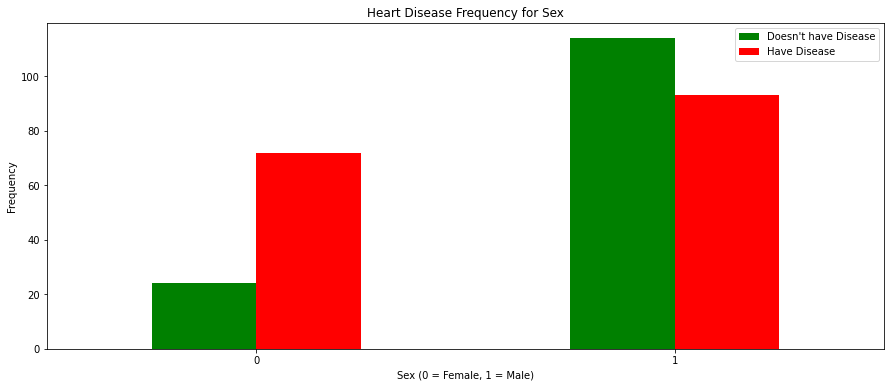

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Doesn't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

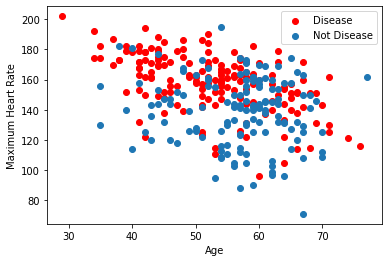

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

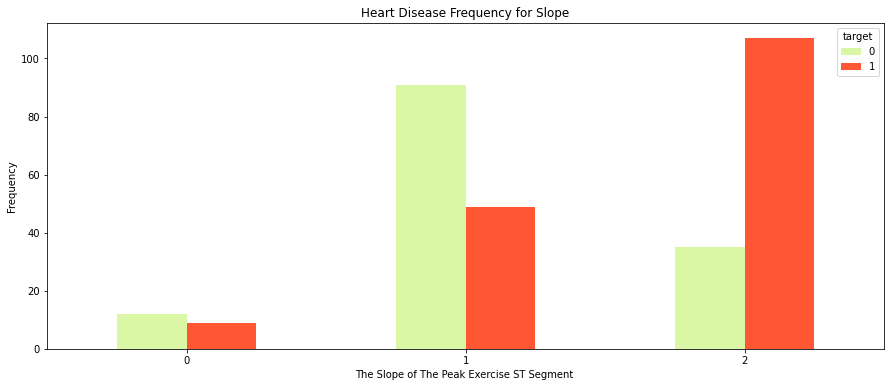

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

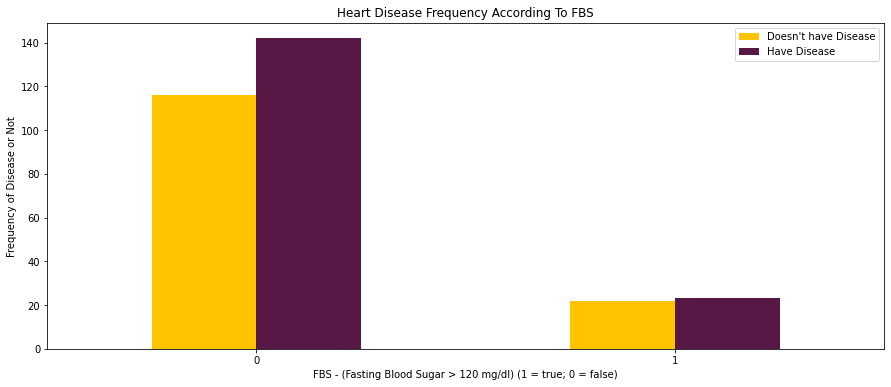

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Doesn't have Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

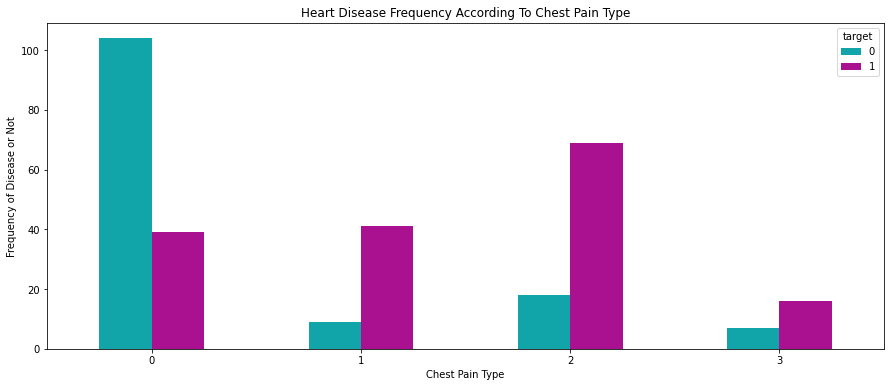

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [ ]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
# taking transpose of the matrix
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

for plotting confusion matrix

In [ ]:
# function to plot confusion matrix
def plot_mat(test_labels, predicted_labels):
  labs = ["Not Disease", "Disease"] 
  mat = confusion_matrix(test_labels, predicted_labels)
  plt.figure(figsize=(5,5))
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
              xticklabels=labs, yticklabels=labs)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

GaussianNB(priors=None, var_smoothing=1e-09)

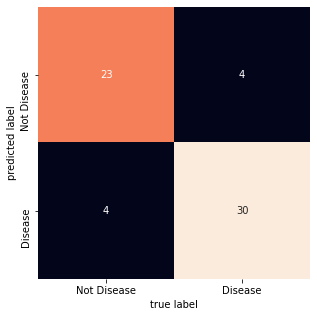

In [ ]:
y_pred_nb = nb.predict(x_test.T)
plot_mat(y_test, y_pred_nb)

In [ ]:
y_pred_train = nb.predict(x_train.T)
cm_test = confusion_matrix(y_pred_nb, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8471074380165289
Accuracy for test set for Naive Bayes = 0.8688524590163934


In [ ]:

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Calculate roc auc
y_score_nb = nb.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_nb)
roc_value

0.8997821350762527

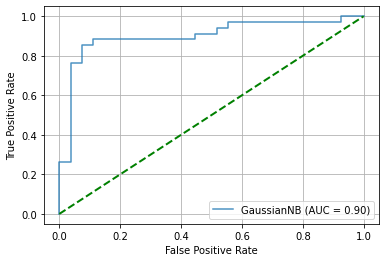

In [ ]:
nb_disp = plot_roc_curve(nb, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

# Logistic Regression

### Sigmoid function

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [ ]:
# taking weight = 0.01 and bias = 0.0

def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

### Forward Backward Propogation

In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

### Gradient Descent

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

Prediction function

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3597736123664534


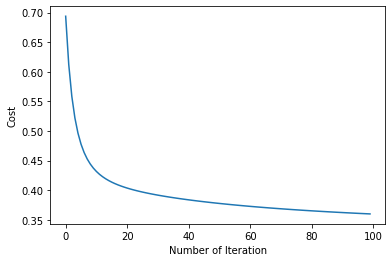

Test Accuracy: 86.89%


In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

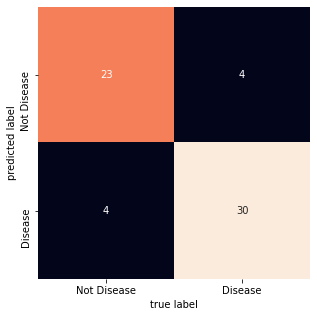

In [ ]:
y_pred_lr = lr.predict(x_test.T)
plot_mat(y_test, y_pred_lr)

In [ ]:
y_pred_train = lr.predict(x_train.T)
cm_test = confusion_matrix(y_pred_lr, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.859504132231405
Accuracy for test set for Logistic Regression = 0.8688524590163934


In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Calculate roc auc
y_score_lr = lr.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_lr)
roc_value

0.9183006535947713

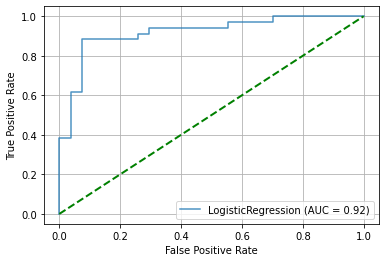

In [ ]:
lr_disp = plot_roc_curve(lr, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

# KNN

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 77.05%


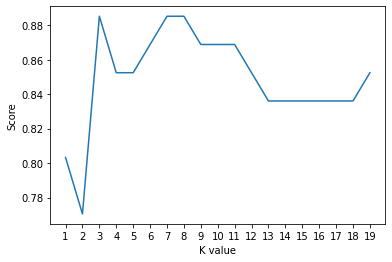

In [ ]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()



As you can see above if we define k as 3-7-8 we will reach maximum score. <br>

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

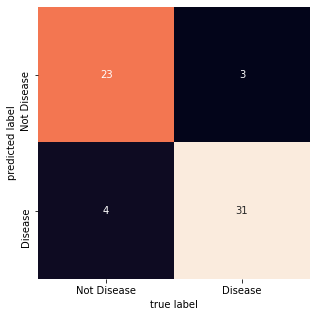

In [ ]:
y_pred_knn = knn3.predict(x_test.T)
plot_mat(y_test, y_pred_knn)

In [ ]:
y_pred_train = knn.predict(x_train.T)
cm_test = confusion_matrix(y_pred_knn, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for KNN = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for KNN = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for KNN = 0.8925619834710744
Accuracy for test set for KNN = 0.8852459016393442


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
# Calculate roc auc
y_score_knn = knn.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_knn)
roc_value

0.8681917211328976

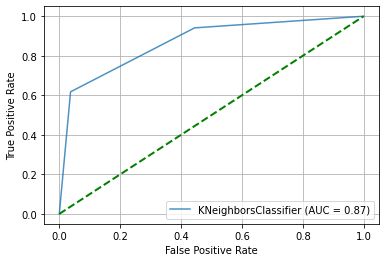

In [ ]:
knn_disp = plot_roc_curve(knn, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1,probability=True)
svm.fit(x_train.T, y_train.T)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

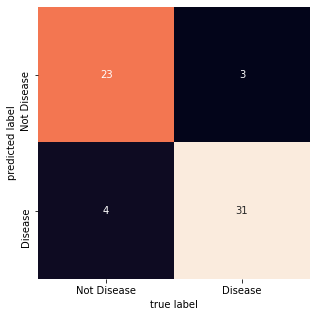

In [ ]:
y_pred_svm = svm.predict(x_test.T)
plot_mat(y_test, y_pred_svm)

In [ ]:
y_pred_train = svm.predict(x_train.T)
cm_test = confusion_matrix(y_pred_svm, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for SVM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for SVM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for SVM = 0.8636363636363636
Accuracy for test set for SVM = 0.8852459016393442


In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
# Calculate roc auc
y_score_svm = svm.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_svm)
roc_value

0.9357298474945532

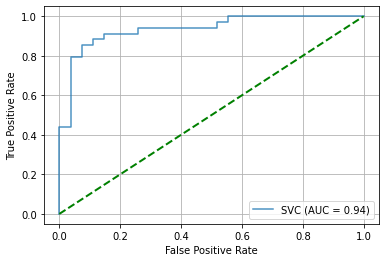

In [ ]:
svm_disp = plot_roc_curve(svm, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train.T, y_train.T)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

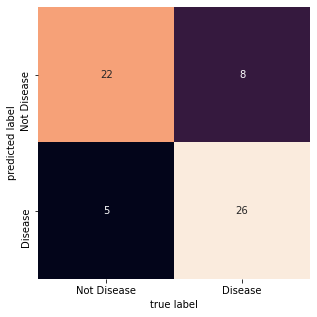

In [ ]:
y_pred_dt = dt.predict(x_test.T)
plot_mat(y_test, y_pred_dt)

In [ ]:
y_pred_train = dt.predict(x_train.T)
cm_test = confusion_matrix(y_pred_dt, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7868852459016393


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
# Calculate roc auc
y_score_dt = dt.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_dt)
roc_value

0.789760348583878

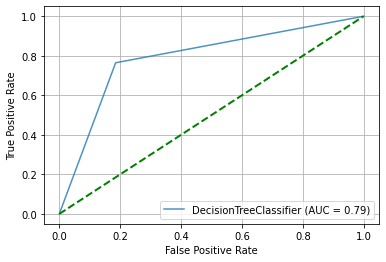

In [ ]:
dt_disp = plot_roc_curve(dt, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

# Random Forest Classifier

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

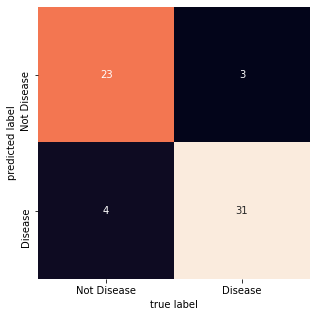

In [ ]:
y_pred_rf = rf.predict(x_test.T)
plot_mat(y_test, y_pred_rf)

In [ ]:
y_pred_train = rf.predict(x_train.T)
cm_test = confusion_matrix(y_pred_rf, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.8852459016393442


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
# Calculate roc auc
y_score_rf = rf.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_rf)
roc_value

0.9368191721132898

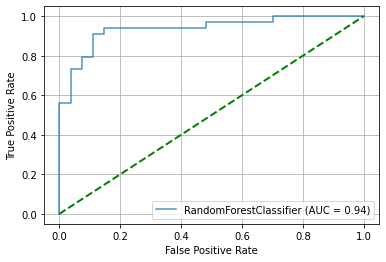

In [ ]:
rfc_disp = plot_roc_curve(rf, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(150,100),max_iter=100,activation='tanh',solver='adam', random_state=0)
nn.fit(x_train.T, y_train.T)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

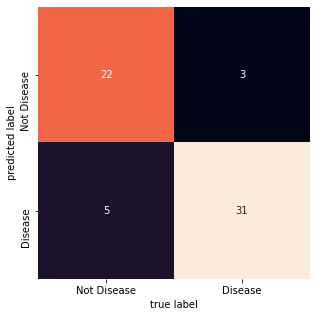

In [ ]:
y_pred_nn = nn.predict(x_test.T)
plot_mat(y_test, y_pred_nn)

In [ ]:
y_pred_train = nn.predict(x_train.T)
cm_test = confusion_matrix(y_pred_nn, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Neural Network = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Neural Network = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Neural Network = 0.859504132231405
Accuracy for test set for Neural Network = 0.8688524590163934


In [ ]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Calculate roc auc
y_score_nn = nn.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_nn)
roc_value

0.9128540305010893

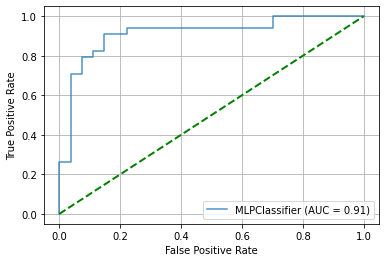

In [ ]:
nn_disp = plot_roc_curve(nn, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

# Boosting

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train.T, y_train.T)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

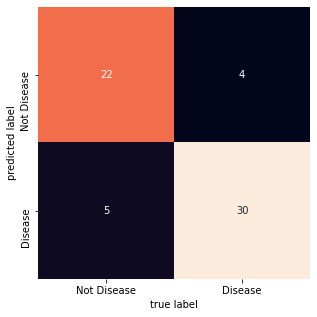

In [ ]:
y_pred_xg = xg.predict(x_test.T)
plot_mat(y_test, y_pred_xg)

In [ ]:
y_pred_train = xg.predict(x_train.T)
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
cm_test = confusion_matrix(y_pred_xg, y_test)       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for XGBoost = 0.9834710743801653
Accuracy for test set for XGBoost = 0.8524590163934426


In [ ]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Calculate roc auc
y_score_xg = xg.predict_proba(x_test.T)[:,1]
roc_value = roc_auc_score(y_test, y_score_xg)
roc_value

0.9477124183006536

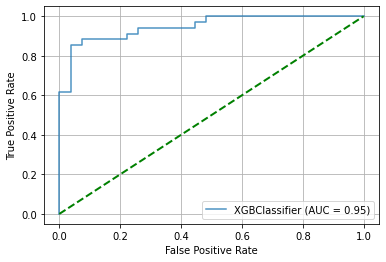

In [ ]:
xg_disp = plot_roc_curve(xg, x_test.T, y_test, alpha=0.8 )
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.grid(True)
plt.show()

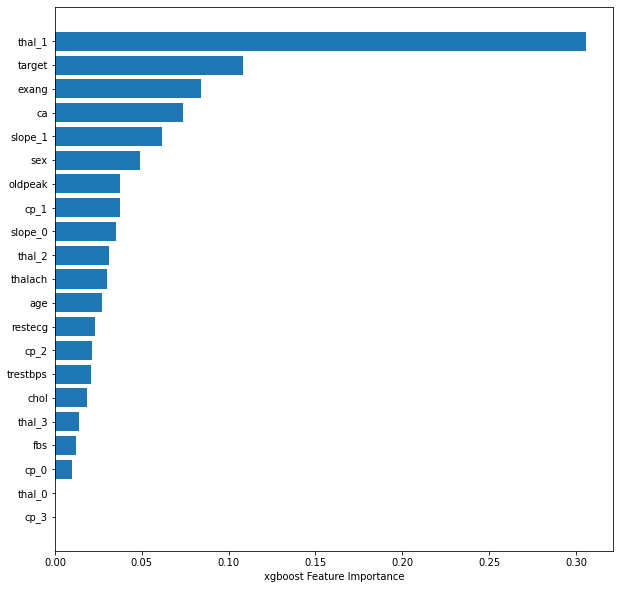

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sorted_id = xg.feature_importances_.argsort()
plt.barh(df.columns[sorted_id],xg.feature_importances_[sorted_id])
plt.xlabel('xgboost Feature Importance');

# Comparing Models

In [ ]:
accuracies={}
accuracies['Naive Bayes']= nb.score(x_test.T,y_test.T)*100
accuracies['Logistic Regression']= lr.score(x_test.T,y_test.T)*100
accuracies['KNN']= max(scoreList)*100
accuracies['SVM']= svm.score(x_test.T,y_test.T)*100
accuracies['Decision Tree']= dt.score(x_test.T,y_test.T)*100
accuracies['Random Forest']= rf.score(x_test.T,y_test.T)*100
accuracies['Neural Network']= nn.score(x_test.T,y_test.T)*100
accuracies['XGBoost']= xg.score(x_test.T,y_test.T)*100

In [ ]:
accuracies

{'Decision Tree': 77.04918032786885,
 'KNN': 88.52459016393442,
 'Logistic Regression': 86.88524590163934,
 'Naive Bayes': 86.88524590163934,
 'Neural Network': 86.88524590163934,
 'Random Forest': 88.52459016393442,
 'SVM': 88.52459016393442,
 'XGBoost': 85.24590163934425}

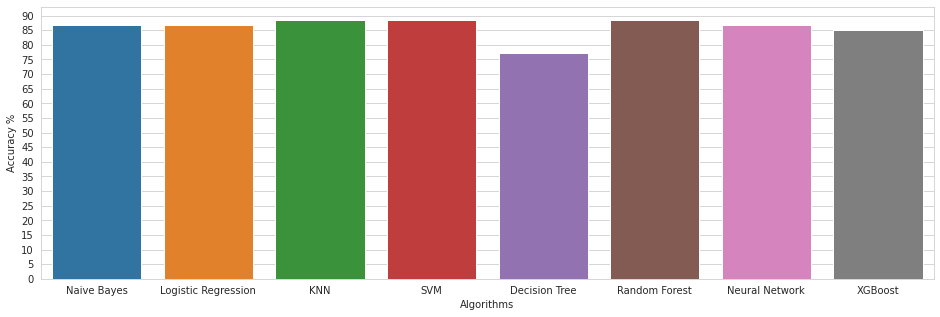

In [ ]:
#colors = ["blue", "green", "orange", "magenta","red", "yellow", "pink"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g',square=True, ax =ax);